In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import basename, exists
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss, roc_auc_score, RocCurveDisplay, roc_curve


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')


In [3]:
# VALIDATION RESULTS

y_predtot=np.zeros(2358)
y_probatot=np.zeros(2358)
y_testtot=np.zeros(2358)
y_results=pd.DataFrame()

max=11
i=max-1

for i in range(max-1,max):
    for k in range(1,11):
        tempdf=pd.read_csv('Model Validation\\Run_'+str(i)+'\\y_results_cvsplit'+str(k)+'.csv',index_col=0)
        y_results=pd.concat((y_results,tempdf))
    y_pred = np.array(y_results['y_pred'])
    y_test = np.array(y_results['y_test'])
    y_proba = np.array(y_results['y_proba_1'])
    print(len(y_pred))

2363


: 

<function matplotlib.pyplot.show(close=None, block=None)>

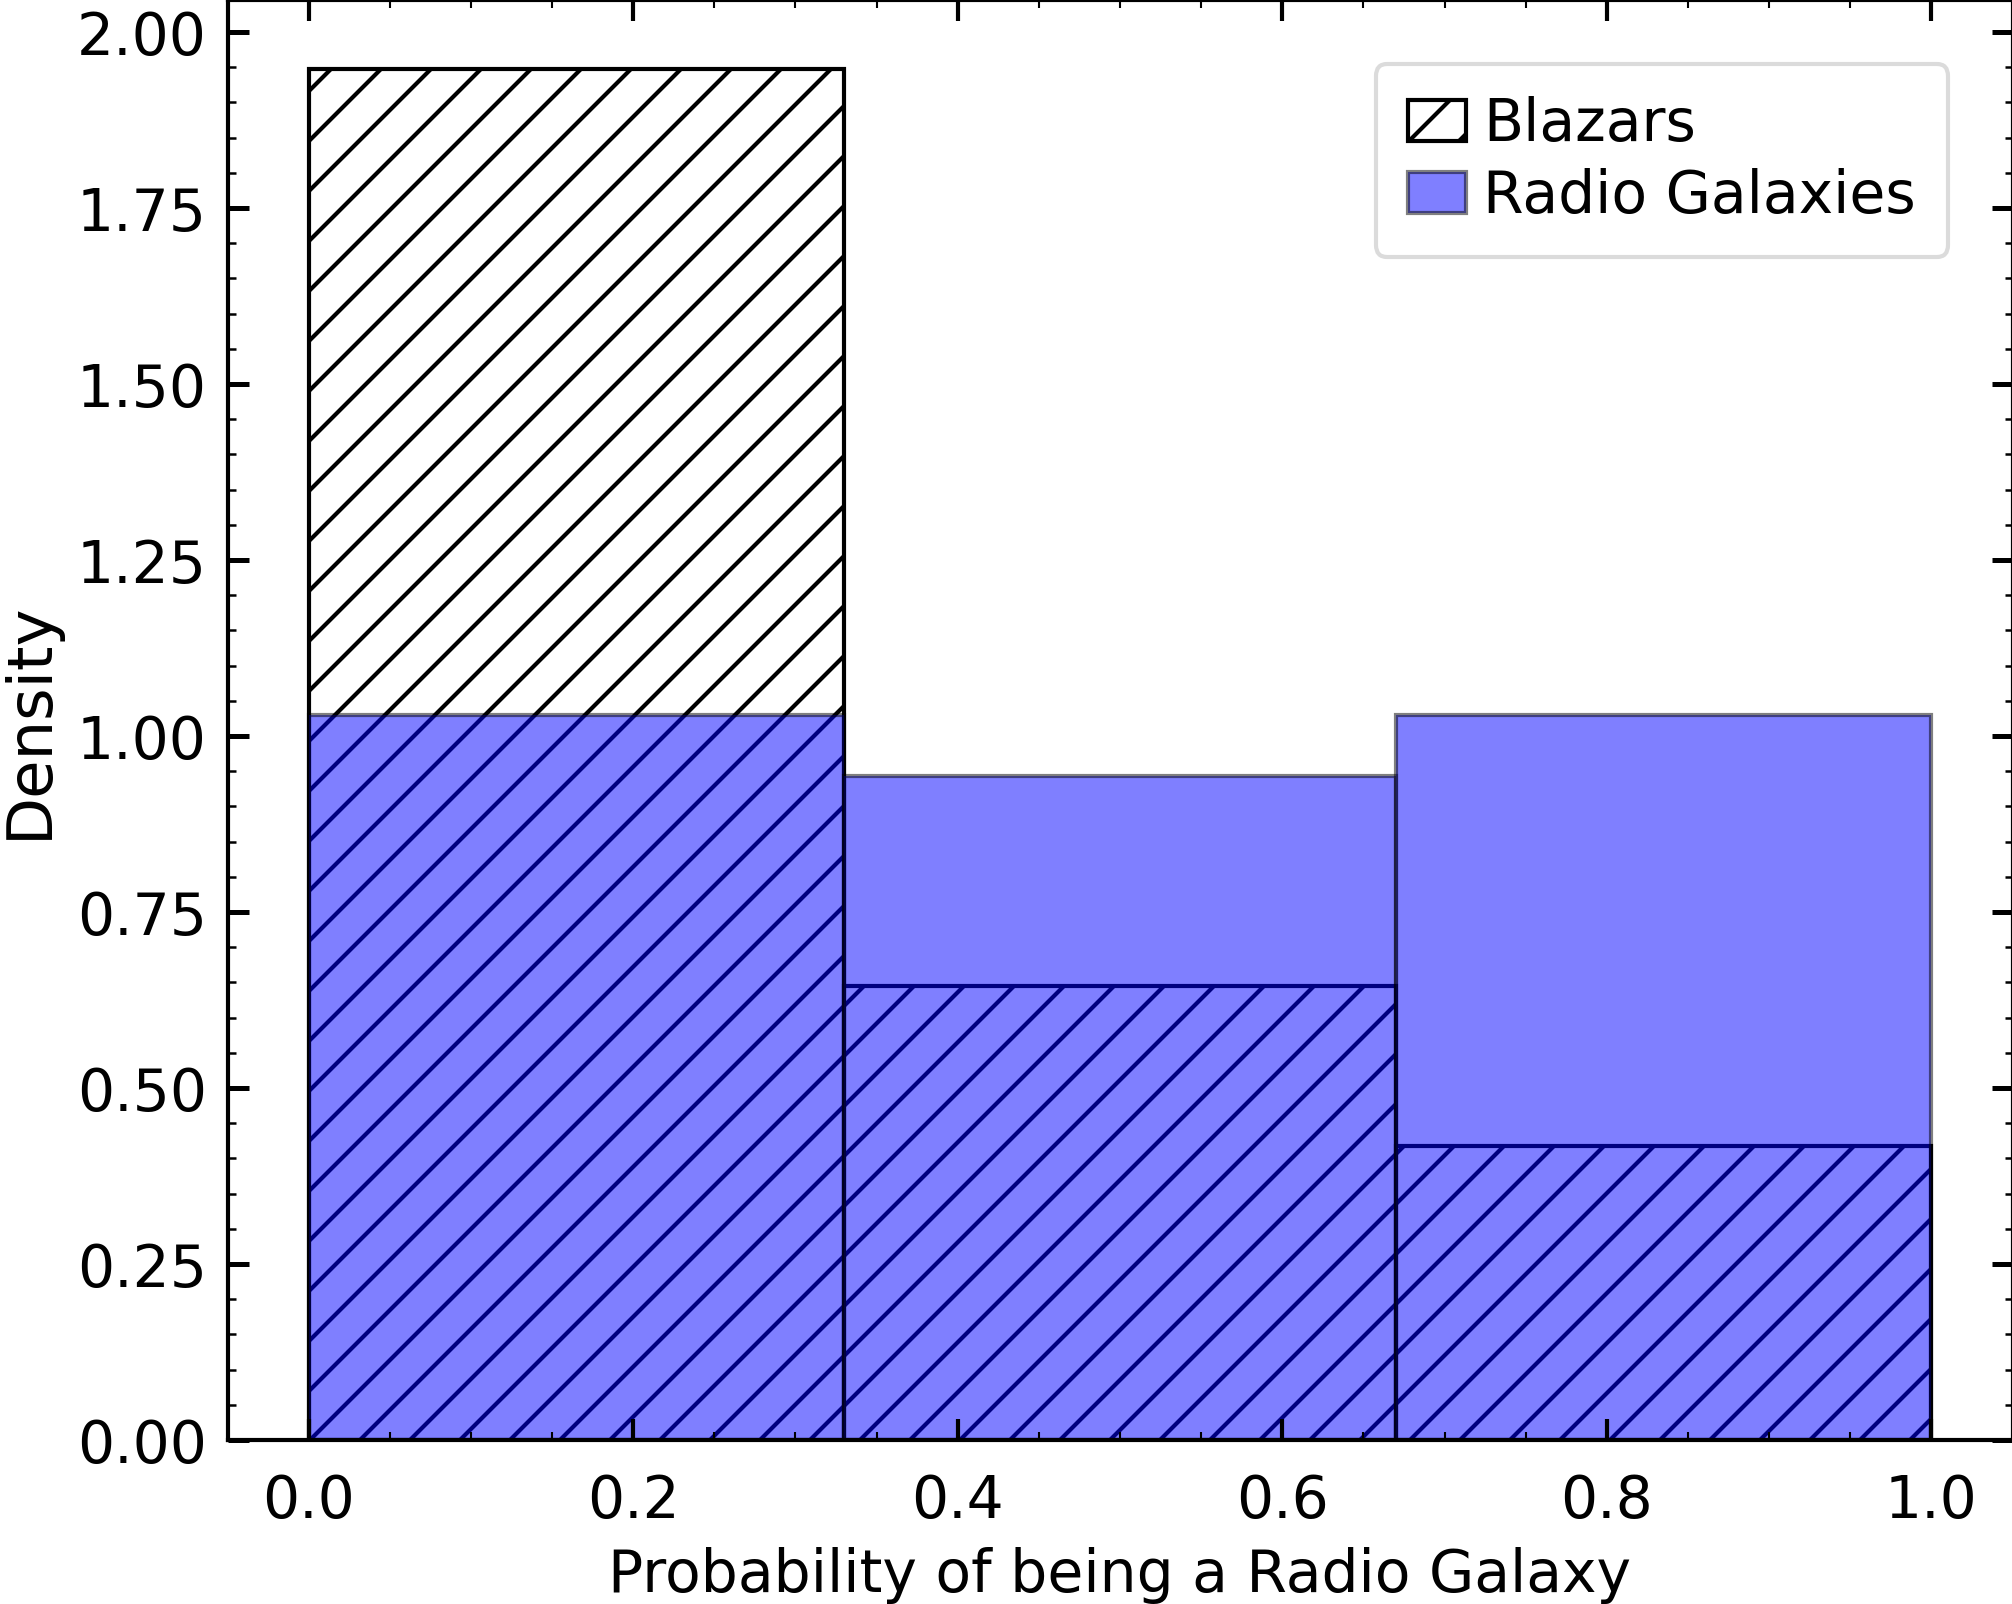

In [130]:
n=14
fig, ax = plt.subplots(figsize=(7,6),dpi=300)

ax.hist(y_results['y_proba_0'].loc[y_results['y_test']==1],density=True,histtype='bar',
        bins=[0,0.33,0.67,1],edgecolor='black',color='white',hatch='//',label='Blazars')
ax.hist(y_results['y_proba_0'].loc[y_results['y_test']==0],density=True,histtype='bar',alpha=0.5,
        bins=[0,0.33,0.67,1],color='blue',edgecolor='black',label='Radio Galaxies')
ax.legend(fontsize=n)
plt.xticks(fontsize=n)
plt.yticks(fontsize=n)
ax.set_ylabel('Density',fontsize=n+1)
ax.set_xlabel('Probability of being a Radio Galaxy', fontsize=n)
plt.show

In [156]:
fy_test=y_results['y_test']
y_pred=y_results['y_pred']
y_proba=y_results['y_proba_1']

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc_weightedavg = roc_auc_score(y_test,y_pred,average='weighted')
logloss = log_loss(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_proba)

resultcols = ['Accuracy', 'ROC AUC', 'ROC Weighted Av', 'Logarithmic Loss', 
        'F1 Score', 'CMatrix11','CMatrix12', 'CMatrix21', 'CMatrix22']
resultarray = np.array((accuracy,roc_auc,roc_auc_weightedavg,logloss,f1,
                        confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]))
rocresultcols = ['FPR','TPR','Thresholds']
rocresultarray = np.array([fpr,tpr,thresholds])
#print(rocresultarray)
results = pd.DataFrame([resultarray],columns=resultcols)
rocresults = pd.DataFrame(np.array([fpr,tpr,thresholds]).transpose(),columns=rocresultcols)
#results.to_csv('Model Validation\\Run '+str(i)+'results_run_'+str(i)+'.csv')
rocresults.to_csv('Model Validation\\Run_'+str(i)+'\\Run '+str(i)+'rocresults_run_'+str(i)+'.csv')

0    0.641834
dtype: float64
0    76.842777
dtype: float64


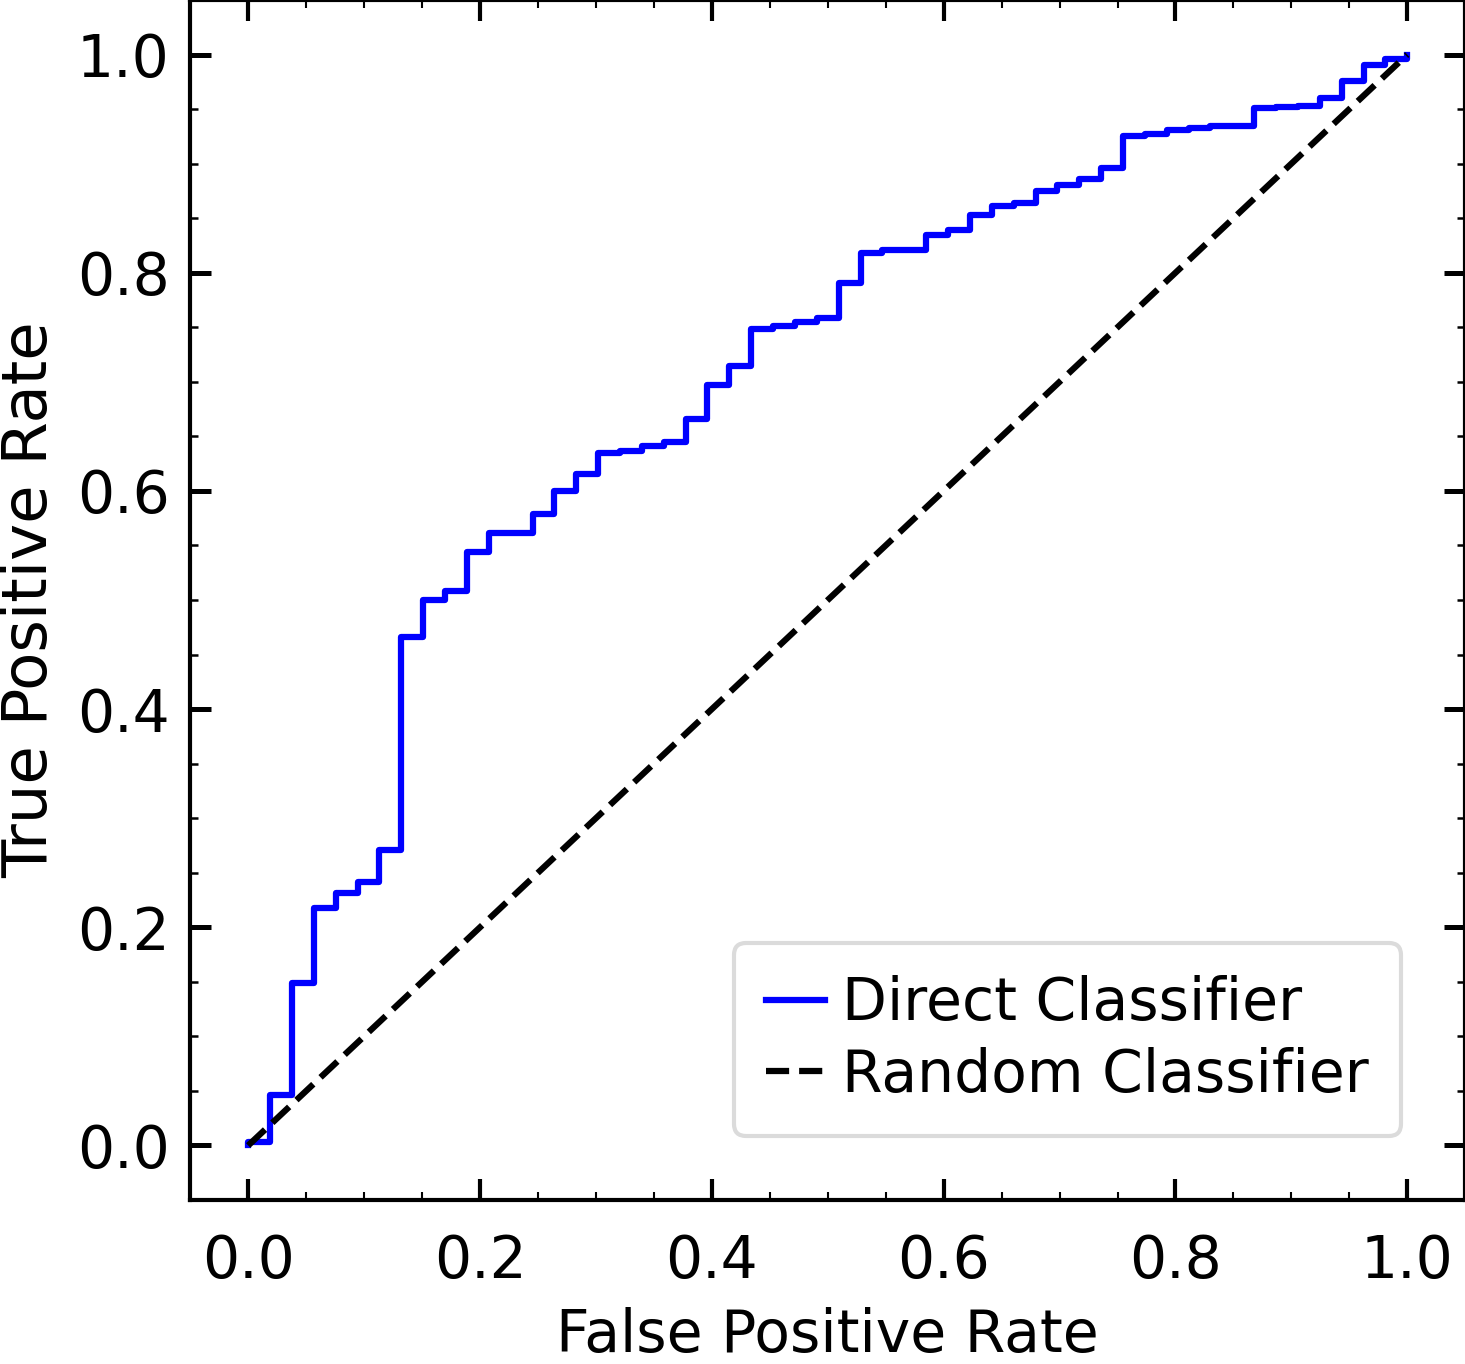

In [188]:
allrocauc=pd.DataFrame()
allaccuracy=pd.DataFrame()
for i in range(1,11):
    results = pd.read_csv('Model Validation\\Run_'+str(i)+'\\Run '+str(i)+'results_run_'+str(i)+'.csv',index_col=0)
    rocresults = pd.read_csv('Model Validation\\Run_'+str(i)+'\\Run '+str(i)+'rocresults_run_'+str(i)+'.csv',index_col=0)
    allrocauc['it'+str(i)]=results['ROC AUC']
    allaccuracy['it'+str(i)]=results['Accuracy']


fpr=rocresults['FPR']
tpr=rocresults['TPR']
thresh=rocresults['Thresholds']

n=14
fig, ax = plt.subplots(figsize=(5,5),dpi=300)

ax.plot(fpr,tpr,color='blue',label='Direct Classifier')
ax.plot([0,1],[0,1],color='black',linestyle='--',label='Random Classifier')
ax.legend(fontsize=n)
plt.xticks(fontsize=n)
plt.yticks(fontsize=n)
ax.set_xlabel('False Positive Rate',fontsize=n)
ax.set_ylabel('True Positive Rate',fontsize=n+1)
print(allrocauc.mean(axis=1))
print(allaccuracy.mean(axis=1))